## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2019.

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/DL-Assignment 3

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/DL-Assignment 3


# Task 1: XOR

In [0]:
# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

## Task 1, Part 1: Backpropagation through time (BPTT)

**Question:** Consider a simple RNN network shown in the following figure, where _wx, wh, b1, w, b2_ are the scalar parameters of the network. The loss function is the **mean squared error (MSE)**. Given input _(x1, x2) = (-1, 0)_, ground truth _(g1, g2) = (1, 0), h0 = 0, (wx, wh, b1, w, b2) = (2, 1, 1, 2, 1)_, compute _(dwx, dwh, db1, dw, db2)_, which are the gradients of loss with repect to 5 parameters _(wx, wh, b1, w, b2)_.

![bptt](./img/bptt2.jpg)

<span style="color:red">TODO:</span>

Answer the above question. 

* **[fill in here: Enter your derivations and the computational process]**
* **Feedforward:**  
$h_1 = \sigma(w_xx_1 + w_hh_0 + b_1) = 0.268$  
$h_2 = \sigma(w_xx_2 + w_hh_1 + b_1) = 0.7805$  
$y_1 = \sigma(wh_1 + b_2) = 0.82$ 
$y_2 = \sigma(wh_2 + b_2) = 0.92$

**Backpropagation:**  


$$dw = \frac{\partial L_1}{\partial y_1}\frac{\partial y_1}{\partial w}+ \frac{\partial L_2}{\partial y_2}\frac{\partial y_2}{\partial w} = (g_1-y_1) \sigma(wh_1+b_2)(1-\sigma(wh_1+b_2)) h_1+(g_2-y_2) \sigma(wh_2+b_2)(1-\sigma(wh_2+b_2)) h_2 = 0.041$$


$$db_2 = \frac{\partial L_1}{\partial y_1}\frac{\partial y_1}{\partial b_2}+ \frac{\partial L_2}{\partial y_2}\frac{\partial y_2}{\partial b_2} = (g_1-y_1) \sigma(wh_1+b_2)(1-\sigma(wh_1+b_2)) +(g_2-y_2) \sigma(wh_2+b_2)(1-\sigma(wh_2+b_2)) = 0.036$$


$$db_1 = \frac{\partial L_1}{\partial y_1}\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial b_1}+ 
\frac{\partial L_2}{\partial y_2}\frac{\partial y_2}{\partial h_2}(\frac{\partial h_2}{\partial b_1} + \frac{\partial h_2}{\partial h_1}\frac{\partial h_1}{\partial b_1})= 0.015$$  


$$dw_x = \frac{\partial L_1}{\partial y_1}\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_x}+ 
\frac{\partial L_2}{\partial y_2}\frac{\partial y_2}{\partial h_2}(\frac{\partial h_2}{\partial w_x} + \frac{\partial h_2}{\partial h_1}\frac{\partial h_1}{\partial w_x}) = 0.0060$$  

$$dw_h = \frac{\partial L_1}{\partial y_1}\frac{\partial y_1}{\partial h_1}\frac{\partial h_1}{\partial w_h}+ 
\frac{\partial L_2}{\partial y_2}\frac{\partial y_2}{\partial h_2}(\frac{\partial h_2}{\partial w_h} + \frac{\partial h_2}{\partial h_1}\frac{\partial h_1}{\partial w_h}) = 0.005$$  


In [0]:
# use tensorflow to verify the answer.
w = tf.Variable(2.0)
b2 = tf.Variable(1.0)
wx = tf.Variable(2.0)
wh = tf.Variable(1.0)
b1 = tf.Variable(1.0)

h0 = tf.Variable(0.0)
x = tf.placeholder(tf.float32, shape=(2,))
g = tf.placeholder(tf.float32, shape=(2,))

y = []
h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
y.append(tf.sigmoid(w*h1 + b2))
h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
y.append(tf.sigmoid(w*h2 + b2))

loss = 0.5*(tf.square(g[0]-y[0]) + tf.square(g[1]-y[1]))

dw, db2, dwx, dwh, db1 = tf.gradients(loss, [w, b2, wx, wh, b1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    dw_t, db2_t, dwx_t, dwh_t, db1_t = sess.run([dw, db2, dwx, dwh, db1],
                                              feed_dict={x: np.asarray([-1.0,0.0]), g: np.asarray([1.0,0.0])})
print("verify by tensorflow")
print(loss)
print("dw = {:.4f}, db2 = {:.4f}, dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}".format(dw_t, db2_t, dwx_t, dwh_t, db1_t))

verify by tensorflow
Tensor("mul_6:0", shape=(), dtype=float32)
dw = 0.0413, db2 = 0.0360, dwx = 0.0060, dwh = 0.0057, db1 = 0.0152


## Task 1, Part 2: Use tensorflow modules to create XOR network

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

XOR network can learn the XOR $\oplus$ function

As shown in the figure below, and for instance, if input $(x0, x1, x2)$=(1,0,0), then output $(y1, y2, y3)$=(1,1,1). That is, $y_n = x_0\oplus x_1 \oplus ... \oplus x_{n-1}$

![xor_net](./img/xor.png)

### Create data set
This function provides you the way to generate the data which is required for the training process. You should utilize it when building your training function for the GRU. Please read the source code for more information.

In [0]:
from utils.xor.dataset import create_dataset

### (Demo) Build a network using a Tensorlow LSTMCell and GRUCell
This section shows an example how to build a RNN network using an LSTM cell or GRU cell. Both LSTM and GRU cell are inbuilt classes in tensorflow which separately implement the real behavior of the LSTM and GRU neuron. 

Reference: 
1. [TensorFlow LSTM cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/LSTMCell)
1. [TensorFlow GRU cell](https://www.tensorflow.org/api_docs/python/tf/nn/rnn_cell/GRUCell)
2. [Understanding GRU networks](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be)

#### LSTM

In [0]:
from tensorflow.contrib.rnn import LSTMCell

# define LSTM cell
lstm_units = 64
cell = LSTMCell(lstm_units,num_proj=2,state_is_tuple=True)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create LSTM network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

#### GRU

In [0]:
from tensorflow.contrib.rnn import GRUCell

# define GRU cell
gru_units = 64
cell = GRUCell(gru_units)


tf.reset_default_graph()

# Input shape: (num_samples, seq_length, input_dimension)
# Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1.
input_data = tf.placeholder(tf.float32, shape=[None,None,1])
output_data = tf.placeholder(tf.int64, shape=[None,None])

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
hidden, _ = tf.nn.dynamic_rnn(cell, input_data, dtype=tf.float32)

# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out, axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))

# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)

# accuracy
correct_num = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct_num,tf.float32))

### Training 

<span style='color:red'>TODO:</span> 
1. Build your training function for RNN (choose either LSTM or GRU); 
2. Plot the cost during the training

In [0]:
# TODO: training
X_train,y_train = create_dataset(2)
print(X_train)
print(y_train)
epochs = 150
training_loss = np.zeros(epochs)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for itr in range(epochs):
        _,accur,training_loss[itr] = sess.run([optimizer,accuracy, loss], feed_dict={input_data: X_train,
                                                                output_data: y_train})
        if itr%10==0:
            print("loss: {} training accuracy : {}%".format(training_loss[itr],accur*100))
sess.close()

[[[1]
  [1]
  [0]
  [0]
  [0]
  [1]
  [0]
  [1]]

 [[1]
  [1]
  [0]
  [0]
  [0]
  [1]
  [1]
  [0]]]
[[1 0 0 0 0 1 1 0]
 [1 0 0 0 0 1 0 0]]
loss: 0.6928473711013794 training accuracy : 50.0%
loss: 0.6101369857788086 training accuracy : 68.75%
loss: 0.5301344990730286 training accuracy : 75.0%
loss: 0.3448178768157959 training accuracy : 81.25%
loss: 0.19165977835655212 training accuracy : 93.75%
loss: 0.5726538300514221 training accuracy : 75.0%
loss: 0.46766093373298645 training accuracy : 75.0%
loss: 0.4615315794944763 training accuracy : 81.25%
loss: 0.32182830572128296 training accuracy : 81.25%
loss: 0.20161773264408112 training accuracy : 93.75%
loss: 0.043553292751312256 training accuracy : 100.0%
loss: 0.019104234874248505 training accuracy : 100.0%
loss: 0.009950587525963783 training accuracy : 100.0%
loss: 0.00699757132679224 training accuracy : 100.0%
loss: 0.0056174155324697495 training accuracy : 100.0%


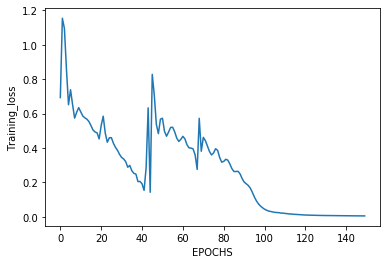

In [0]:
# TODO: plot loss history
from matplotlib import pyplot as plt
plt.plot(np.arange(epochs),training_loss)
plt.ylabel('Training_loss')
plt.xlabel('EPOCHS')
plt.show()

## Task 1, Part 3 :  Build your own LSTMCell
In this part, you need to build your own LSTM cell to achieve the LSTM functionality. 

<span style="color:red">TODO:</span> 
1. Finish class **MyLSTMCell** in utils/xor/rnn.py;
2. Write the training function for your RNN;
3. Plot the cost during training.

In [0]:
from utils.xor.rnn import MyLSTMCell

In [0]:
from utils.xor.rnn import MyLSTMCell
# recreate xor netowrk with your own LSTM cell

tf.reset_default_graph()

#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, output_ground_truth), and output_ground_truth is 0/1. 
input_data = tf.placeholder(tf.float32,shape=[None,None,1])
output_data = tf.placeholder(tf.int64,shape=[None,None])   

# recreate xor netowrk with your own LSTM cell
lstm_units = 64
cell = MyLSTMCell(lstm_units,num_proj=2)

# create GRU network: you can also choose other modules provided by tensorflow, like static_rnn etc.
#hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
hidden, _ = tf.nn.dynamic_rnn(cell,input_data,dtype=tf.float32)
# generate output from the hidden information
output_shape = 2
out = tf.layers.dense(hidden, output_shape)
pred = tf.argmax(out,axis=2)

# loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=output_data,logits=out))
# optimization
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(loss)
# accuracy
correct = tf.equal(output_data,pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

### Training

In [0]:
# TODO: plot loss history
X_train,y_train = create_dataset(1000)
epochs = 150
training_loss = np.zeros(epochs)
accur = np.zeros(epochs)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    itr = 0
    while itr < epochs:
        _,accur[itr],training_loss[itr] = sess.run([optimizer,accuracy, loss], feed_dict={input_data: X_train,
                                                                output_data: y_train})
        
        if itr%10==0:
          print("ieration=", itr, "loss: {} training accuracy : {}%".format(training_loss[itr],accur[itr]*100))
          if itr>60:
            length= 30
            a = np.asarray(accur[itr-length: itr])
            b = np.asarray(accur[itr-length-1:itr-1])
            if np.allclose(a,b, atol=1e-03) :
              if accur[itr-1] <= 0.9: 
                itr=0
                training_loss = np.zeros(epochs)
                accur = np.zeros(epochs)
                sess.run(tf.global_variables_initializer())
                print("session reset")
        itr+=1

            
sess.close()

ieration= 0 loss: 0.7862099409103394 training accuracy : 61.17500066757202%
ieration= 10 loss: 0.6875877976417542 training accuracy : 50.612497329711914%
ieration= 20 loss: 0.6864586472511292 training accuracy : 59.712499380111694%
ieration= 30 loss: 0.6821363568305969 training accuracy : 59.712499380111694%
ieration= 40 loss: 0.675642728805542 training accuracy : 59.712499380111694%
ieration= 50 loss: 0.6665252447128296 training accuracy : 59.76250171661377%
ieration= 60 loss: 0.6533665657043457 training accuracy : 61.61249876022339%
ieration= 70 loss: 0.6368498802185059 training accuracy : 62.449997663497925%
ieration= 80 loss: 0.5841303467750549 training accuracy : 67.42500066757202%
ieration= 90 loss: 0.3601979911327362 training accuracy : 91.35000109672546%
ieration= 100 loss: 0.09971591085195541 training accuracy : 100.0%
ieration= 110 loss: 0.030047070235013962 training accuracy : 100.0%
ieration= 120 loss: 0.015184958465397358 training accuracy : 100.0%
ieration= 130 loss: 0.01

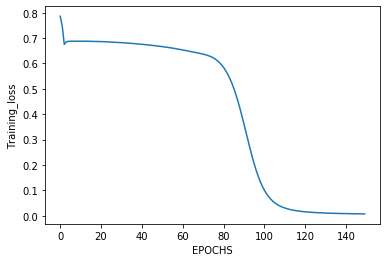

In [0]:
# TODO: training
from matplotlib import pyplot as plt
plt.plot(np.arange(epochs),training_loss)
plt.ylabel('Training_loss')
plt.xlabel('EPOCHS')
plt.show()